# SARSA for article

In [1]:
import numpy as np
import random
from random import sample
import math 

In [2]:
z = 10 #Degradation threshold

def state(amount):
    new_state = []    
    if (amount >= 0 and amount <3):
        new_state = 0 # healthy1
    
    if (amount >= 3 and amount <7):
        new_state = 1 # healthy2
        
    if (amount >= 7 and amount < z ):
        new_state = 2 #healthy3 
        
    if (amount >= z):
        new_state = 3 # fail
    
    return new_state

In [3]:
def Rewardfun(degradation):
    Reward=np.zeros((4,)+(3,))
    Reward[: , 0] = -50
    Reward[3,0] = -1050
    Reward[: , 1] = -500*(degradation/z)-50
    Reward[3,1] = -1150
    Reward[: , 2] = -550
    Reward[3,2] = -1550
       
    return Reward

In [4]:
a = 8

def Envirenment(degradation , action):
   
    n2 = np.random.poisson((1-0.001)*4, 1) # number of effective shock
    w2 = np.random.gamma(0.6, 1.2, n2) # magnitude of effective shock
    magnitude = sum(w2)
    next_state = 0
    reward = 0
    
    if action == 0 :#do nothing
        
            degradation += (magnitude + 3)/a
            next_state=state(degradation)
            Reward=Rewardfun(degradation)
            reward=Reward[next_state,action]
        
    if action == 1 : #repair
        
           # decay = degradation*np.random.beta(0.5, 1, 1)
            #decay = degradation/z
            #degradation -= decay*degradation
            degradation = np.max((0.05, degradation))
            decay =(np.random.gamma(degradation*degradation/2,2/(degradation),1)/z)[0]
            degradation -= np.max((0, decay*degradation))
            degradation = np.max((0.05, degradation))
            degradation += (magnitude + 2.95)/a
            next_state=state(degradation)
            Reward=Rewardfun(degradation)
            reward=Reward[next_state,action]
                    
    if action == 2 : # replace
        
            degradation = (magnitude + 2.85)/a
            next_state=state(degradation)
            Reward=Rewardfun(degradation)
            reward=Reward[next_state,action]
       
    
    return next_state , reward , degradation


In [5]:
def choose_action(epsilon,current_state):
    if current_state == 3 :
        return 2 #replace
    else:
        if (np.random.random() < epsilon):
            return random.choice([0,1,2]) 
        else:
            return np.argmax(Q_table[current_state])

In [6]:
num_episodes=2000
discount=0.88

In [9]:
epsilon = 1
learning_rate = 1

Q_table = np.zeros((4, ) + (3,))
old_Q = 0

Q_table[3,0]= -100000000
Q_table[3,1]= -100000000
scores = []
deltas = []
# Looping for each episode
for e in range(500):
    # Initializes the state
    current_state = 0 #it is new
    degradation = 0  #it is new
    action = choose_action(epsilon,current_state)
    rewards = []
    biggest_change = 0   
    # Looping for each step
    for j in range(100 +1):
        # Take one step in the environment
        next_state , reward , degradation  = Envirenment(degradation,action)
        
        # choose the next action (needed for the SARSA update)
        next_action = choose_action(epsilon, next_state)
        
        rewards.append(reward)
        old_Q = Q_table[current_state][action]
        # SARSA Update
        Q_table[current_state][action] += (learning_rate * 
                                        (reward 
                                         + discount * Q_table[next_state][next_action]
                                         - Q_table[current_state][action]))
        
        biggest_change = max(biggest_change, np.abs(old_Q - Q_table[current_state][action]))
        
        current_state = next_state
        action = next_action
        
    learning_rate *= 0.99
    epsilon *= 0.99
    scores.append(sum(rewards))
    deltas.append(biggest_change)

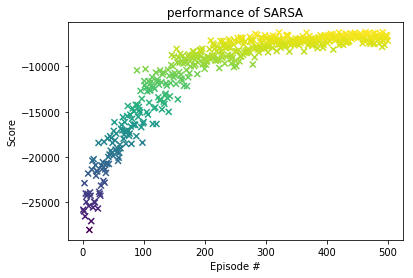

In [10]:
# Plot the policy performance
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(1, len(scores) + 1)
y = scores
plt.scatter(x, y, marker='x', c=y)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title(' performance of SARSA ')
plt.show()

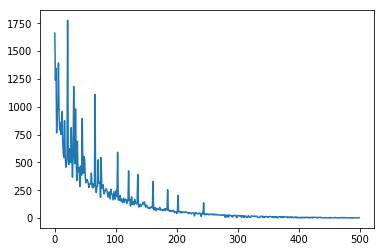

In [11]:
import matplotlib.pyplot as plt
plt.plot(deltas)
plt.show()

In [32]:
optimal_value =[]
current_state = 0 #it is new
degradation = 0
optimal_cost = []
expected_optimal_cost=[]

for j in range(2000+1):
     #Choose A from S
    action = np.argmax(Q_table[current_state])
    if action == 1:
        optimal_value.append(degradation)    
    # Take action
    current_state, reward ,degradation = Envirenment(degradation,action)
    optimal_cost.append(-reward)
    #print(optimal_cost)
    if any(np.array(optimal_cost) > 50):
        expected_optimal_cost.append(np.mean(optimal_cost))
    if action ==1:
          optimal_cost = []
    #print (reward ,degradation , action)

#print(optimal_value)
##print(".................")
#print(expected_optimal_cost)
#print(".................")
print("optimal degradation for repair=",np.mean(optimal_value))
print(".................")
print("cost for repair =",np.mean(expected_optimal_cost))

optimal degradation for repair= 7.421048310170899
.................
cost for repair = 68.29040394023137


In [12]:

optimal_value =[]
current_state = 0 #it is new
degradation = 0
optimal_cost = []
expected_optimal_cost=[]
num=[]
numm =[]

        
for j in range(2000+1):
    #Choose A from S
    action = np.argmax(Q_table[current_state])
    if action == 1:
        optimal_value.append(degradation) 
        num.append(j)
    
    numm =[3*num[i] - 3*num[i-1] for i in range(1, len(num))]
    #print(num , numm)
    # Take action
    current_state, reward ,degradation= Envirenment(degradation,action)
    optimal_cost.append(-reward)
    #print(optimal_cost)
    if any(np.array(optimal_cost) > 50):
        expected_optimal_cost.append(np.mean(optimal_cost))
    if action ==1:
        optimal_cost = []
    #print (reward ,degradation , action)
    
#print(optimal_value)
#print(".................")
#print(expected_optimal_cost)
#print(".................")
print("optimal degradation for repair=",np.mean(optimal_value))
#print(".................")
print("cost for repair =",np.mean(expected_optimal_cost))
print("Time for repair =",np.mean(numm))
#print("Time for repair =",numm)

optimal degradation for repair= 7.442799353796197
cost for repair = 69.08039185894249
Time for repair = 22.337078651685392
